In [17]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [58]:
rng = np.random.default_rng(42)
def gen_x1_s1(size = 1):
    return rng.normal(5, 2, size)
def gen_x2_s2(size = 1):
    return rng.normal(10, 1, size)
def lik_x1(x, s):
    return norm.pdf(x, s, 2)
def lik_x2(x, s):
    return norm.pdf(x, s, 1)
def lik_x1_x2(x1, x2, s):
    return norm.pdf(x1, s, 2) * norm.pdf(x2, s, 1)

def PME_esti(x1, x2, width = 0.1):
    s_range = np.arange(-5, 15, width).reshape(-1, 1)
    comb_lik = lik_x1_x2(x1, x2, s_range)
    idx = comb_lik.argmax(0)
    return s_range[idx]
    

Text(0.5, 1.0, 'x1 5.609, x2 8.960, PME 8.300')

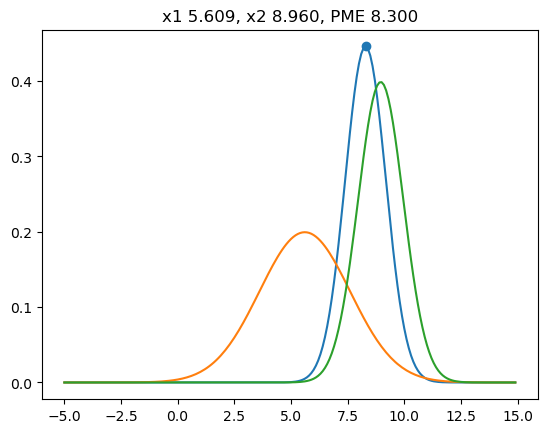

In [60]:
x1 = gen_x1_s1()
x2 = gen_x2_s2()
width = 0.1
s_range = np.arange(-5, 15, width).reshape(-1, 1)
comb_lik = lik_x1_x2(x1, x2, s_range)
Z = comb_lik.sum() * width
plt.plot(s_range, comb_lik/Z)

plt.plot(s_range, lik_x1(x1, s_range))
plt.plot(s_range, lik_x2(x2, s_range))

idx = comb_lik.argmax(0)
plt.scatter(s_range[idx], comb_lik[idx]/Z)
plt.title(f'x1 {x1.item():.3f}, x2 {x2.item():.3f}, PME {s_range[idx].item():.3f}')


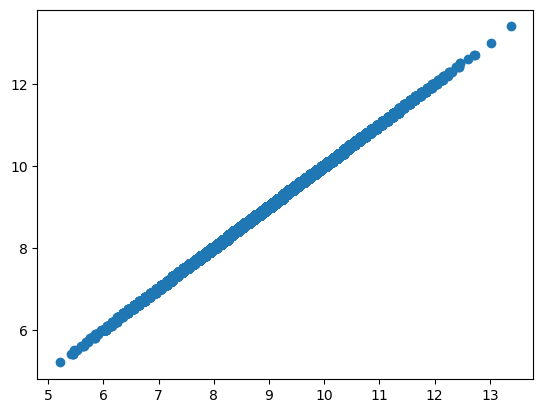

In [78]:
x1 = gen_x1_s1(100000)
x2 = gen_x2_s2(100000)
s_pm = PME_esti(x1, x2)
plt.scatter((0.25 * x1 + x2)/1.25, s_pm)
plt.plot([6, 12], [6, 12])


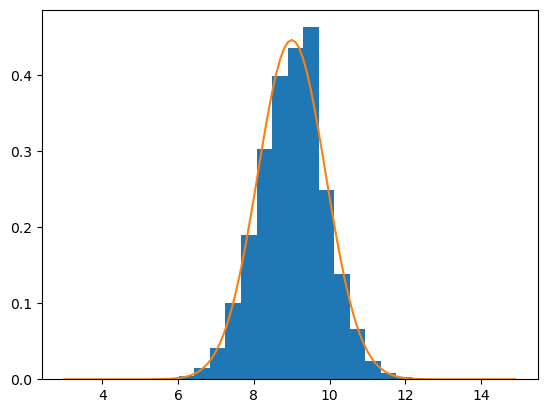

In [79]:
plt.hist(s_pm, bins = 20, density = True)
plt.plot(s_range[80:], norm.pdf(s_range[80:], 9, np.sqrt(0.8)))

In [82]:
np.log(4)/8

0.17328679513998632